In [100]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from bs4 import BeautifulSoup 
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences
import urllib.request
np.random.seed(seed=0)

In [101]:
import nltk
# nltk.download()

In [102]:
df = pd.read_csv('D:\LYS\Team Project2(빅데이터를 활용한 소방안전에 대한 동향분석 및 정책이슈 도출)-20221211T134252Z-001\Data\연합뉴스API\df100000.csv', encoding = 'utf-8')
df

,Unnamed: 0,_index,_type,_id,_score,YNewsML.Header.SendTime,YNewsML.Header.Action,YNewsML.Header.ServiceType,YNewsML.Header.ContentID,YNewsML.Header.SendDate,...,YNewsML.Metadata.Region.RegionCode,YNewsML.Metadata.Attribute.AttributeCode,YNewsML.RefContent,YNewsML.Metadata.Issue.IssueCode.code,YNewsML.Metadata.Issue.IssueCode.name,YNewsML.RefContent.Title,YNewsML.RefContent.Href,YNewsML.RefContent.ContentID,YNewsML.RefContent.type,YNewsML.Metadata.Embargo
0,0,rens_test,_doc,AKR20210105121500009,NaN,160431,C,AKR0,AKR20210105121500009,20210105,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,rens_test,_doc,AKR20210105124700009,NaN,160508,C,AKR0,AKR20210105124700009,20210105,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,rens_test,_doc,AKR20210105123300530,NaN,160514,C,AKR0,AKR20210105123300530,20210105,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,rens_test,_doc,AKR20210105126900002,NaN,160538,C,AKR0,AKR20210105126900002,20210105,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,rens_test,_doc,AKR20210105126800017,NaN,160650,C,AKR0,AKR20210105126800017,20210105,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109995,109995,rens_test,_doc,PYH20210406053100013,NaN,104446,C,PYH0,PYH20210406053100013,20210406,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109996,109996,rens_test,_doc,PYH20210406053200013,NaN,104450,C,PYH0,PYH20210406053200013,20210406,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109997,109997,rens_test,_doc,PYH20210406053300013,NaN,104457,C,PYH0,PYH20210406053300013,20210406,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109998,109998,rens_test,_doc,AKR20210406067000001,NaN,104505,C,AKR0,AKR20210406067000001,20210406,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
df.columns.tolist()

['Unnamed: 0',
 '_index',
 '_type',
 '_id',
 '_score',
 'YNewsML.Header.SendTime',
 'YNewsML.Header.Action',
 'YNewsML.Header.ServiceType',
 'YNewsML.Header.ContentID',
 'YNewsML.Header.SendDate',
 'YNewsML.Metadata.Category.code',
 'YNewsML.Metadata.Category.name',
 'YNewsML.Metadata.Credit',
 'YNewsML.Metadata.DeliCode',
 'YNewsML.Metadata.Href',
 'YNewsML.Metadata.Desk.code',
 'YNewsML.Metadata.Desk.content',
 'YNewsML.Metadata.Class.ClassCode',
 'YNewsML.Metadata.Urgency',
 'YNewsML.Metadata.Source',
 'YNewsML.Metadata.Writer.uid',
 'YNewsML.Metadata.Writer.content',
 'YNewsML.NewsContent.LangType',
 'YNewsML.NewsContent.Title',
 'YNewsML.NewsContent.Body',
 'send_timestamp',
 'YNewsML.Metadata.Region.RegionCode.code',
 'YNewsML.Metadata.Region.RegionCode.name',
 'YNewsML.NewsContent.SubTitle',
 'YNewsML.Metadata.Attribute.AttributeCode.code',
 'YNewsML.Metadata.Attribute.AttributeCode.name',
 'YNewsML.Metadata.Class.ClassCode.code',
 'YNewsML.Metadata.Class.ClassCode.name',
 'YNew

In [104]:
# 뉴스 제목과 본문만 우선적으로 추출
df1 = df[['YNewsML.NewsContent.Title', 'YNewsML.NewsContent.Body']]
df1

,YNewsML.NewsContent.Title,YNewsML.NewsContent.Body
0,"인니 대표 스타트업 고젝, 토코피디아와 합병 논의","인니 대표 스타트업 고젝, 토코피디아와 합병 논의\n\r\n (서울=연합뉴스)..."
1,중앙아프리카공화국 대선 결과 투아데레 대통령 재선,중앙아프리카공화국 대선 결과 투아데레 대통령 재선\n폭력 사태 속 치러진 선거서 과...
2,"당국, 동부구치소 사망자 늑장통보 논란에 ""화장 전에 통보했다""","당국, 동부구치소 사망자 늑장통보 논란에 ""화장 전에 통보했다""\n\r\n<YNAO..."
3,삼성전자 사흘째 최고가 경신…시총 500조 시대,삼성전자 사흘째 최고가 경신…시총 500조 시대\n\r\n<YNAOBJECT id=...
4,"지아이그룹-세브란스병원, 혁신 신약 개발 공동연구 협약","지아이그룹-세브란스병원, 혁신 신약 개발 공동연구 협약\n\r\n (서울=연합..."
...,...,...
109995,국무회의에서 발언하는 정세균 총리,국무회의에서 발언하는 정세균 총리\r\n (세종=연합뉴스) 김주형 기자 = 정...
109996,의사봉 두드리는 정세균 총리,의사봉 두드리는 정세균 총리\r\n (세종=연합뉴스) 김주형 기자 = 정세균 ...
109997,국무회의에서 발언하는 정세균 총리,국무회의에서 발언하는 정세균 총리\r\n (세종=연합뉴스) 김주형 기자 = 정...
109998,"정총리 ""투기근절 개혁 필수…공직사회 흔들림 없어야""","정총리 ""투기근절 개혁 필수…공직사회 흔들림 없어야""\n""투표는 세상을 바꿀 소중한..."


In [105]:
print('뉴스제목 열에서 중복을 배제한 유일한 샘플의 수 : ', df1['YNewsML.NewsContent.Title'].nunique())
print('뉴스본문 열에서 중복을 배제한 유일한 샘플의 수 : ', df1['YNewsML.NewsContent.Body'].nunique())

뉴스제목 열에서 중복을 배제한 유일한 샘플의 수 :  76279
뉴스본문 열에서 중복을 배제한 유일한 샘플의 수 :  84459


In [106]:
# 제목과 본문 열에서 중복인 내용이 있다면 중복 제거
df1.drop_duplicates(subset=['YNewsML.NewsContent.Title', 'YNewsML.NewsContent.Body'], inplace=True)
print("전체 샘플수 :", len(df1))

전체 샘플수 : 84459


C:\Users\DMC CONET\AppData\Local\Temp\ipykernel_11844\4171227445.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop_duplicates(subset=['YNewsML.NewsContent.Title', 'YNewsML.NewsContent.Body'], inplace=True)


In [107]:
df1.isnull().sum()

YNewsML.NewsContent.Title    0
YNewsML.NewsContent.Body     0
dtype: int64

In [108]:
from hanspell import spell_checker

In [109]:
result = spell_checker.check(df1['YNewsML.NewsContent.Title'][123])
result.as_dict()  # dict로 출력

{'result': True,
 'original': '협동조합 회장단, 총리에 농수산물 선물가액 상향 건의',
 'checked': '협동조합 회장단, 총리에 농수산물 선물가 핵 상향 건의',
 'errors': 1,
 'words': OrderedDict([('협동조합', 0),
              ('회장단,', 0),
              ('총리에', 0),
              ('농수산물', 0),
              ('선물가', 4),
              ('핵', 4),
              ('상향', 0),
              ('건의', 0)]),
 'time': 0.05485248565673828}

In [110]:
# NLTK의 불용어
stop_words = set(stopwords.words('english'))
print('불용어 개수 :', len(stop_words))
print(stop_words)

불용어 개수 : 179
{'in', 'but', 'herself', 'ain', 'are', 'me', 'below', 'each', 'other', 'doing', 'm', "haven't", "won't", 'both', 'doesn', 'down', 'while', 've', 'having', 'when', 't', 'same', 'all', 'some', 'between', 'isn', 'myself', 'aren', "weren't", 'few', 'shan', 'or', 'of', 'now', 'my', 'it', "you'd", 'hasn', "you've", 'd', 'ma', 'mustn', 'own', 'nor', 'been', "shan't", "hasn't", 'after', 'a', 'we', 'through', "shouldn't", 'be', 'wouldn', 'up', 'as', 'if', 'does', 'and', 'our', 'that', 'ours', 'only', 'from', 'into', 'o', "it's", 'during', 'was', 'just', 'by', 'no', 'he', 'has', 'any', 'have', 'too', 's', "wasn't", 'her', 'had', "mightn't", 'there', 'don', 'most', 'i', 'shouldn', 'with', 'to', 'at', 'further', 'than', 'where', 'haven', 'under', 'yourself', 'did', 'didn', 'such', 'its', "that'll", 'his', 'the', 'on', "you're", 're', 'y', 'their', 'those', 'against', 'again', 'not', 'then', 'whom', 'themselves', 'am', 'your', 'itself', 'until', "isn't", 'do', 'is', 'couldn', "you'll",

In [111]:
def clean_str(text, remove_stopwords = True):
    pattern = '([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)' # E-mail제거
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '(http|ftp|https)://(?:[-\w.]|(?:%[\da-fA-F]{2}))+' # URL제거
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '<[^>]*>'         # HTML 태그 제거
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '[^\w\s\n]'         # 특수기호제거 (% 기호는 제거하지 않음)
    text = re.sub(pattern=pattern, repl='', string=text)
    text = re.sub('[-=+,#/\?:^$.@*\"※~&ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]','', string=text)
    text = re.sub('\n', '.', string=text)
    pattern = '([ㄱ-ㅎㅏ-ㅣ]+)'  # 한글 자음, 모음 제거
    text = re.sub(pattern=pattern, repl='', string=text)
    
    # 불용어 제거 (Text)
    if remove_stopwords:
        tokens = ' '.join(word for word in text.split() if not word in stop_words if len(word) > 1)
    # 불용어 미제거 (Summary)
    else:
        tokens = ' '.join(word for word in text.split() if len(word) > 1)
    return tokens

In [112]:
print("Before Extraction : ",df1['YNewsML.NewsContent.Title'][123])
print("After Extraction : ", clean_str(df1['YNewsML.NewsContent.Title'][123]))

Before Extraction :  협동조합 회장단, 총리에 농수산물 선물가액 상향 건의
After Extraction :  협동조합 회장단 총리에 농수산물 선물가액 상향 건의


In [113]:
print("Before Extraction : ",df1['YNewsML.NewsContent.Body'][123])
print("After Extraction : ", clean_str(df1['YNewsML.NewsContent.Body'][123]))

Before Extraction :  협동조합 회장단, 총리에 농수산물 선물가액 상향 건의

<YNAOBJECT id="PYH20210105170100013" type="02" category="image">
	<RefDetailAttribute>0</RefDetailAttribute>
	<Title>정세균 총리, 농협ㆍ수협ㆍ산림조합ㆍ중소기업중앙회 회장단 면담</Title>
	<Caption>(서울=연합뉴스) 정세균 국무총리(가운데)가 5일 정부서울청사에서 농협ㆍ수협ㆍ산림조합ㆍ중소기업중앙회 회장단과 면담을 마치고 기념촬영을 하고 있다.
    왼쪽부터 임준택 수협중앙회장, 김기문 중소기업중앙회장, 정 총리, 이성희 농협중앙회장, 최창호 산림조합중앙회장. 2021.1.5 
    [농협 제공. 재판매 및 DB 금지] photo@yna.co.kr</Caption>
	<Description>정세균 총리, 농협ㆍ수협ㆍ산림조합ㆍ중소기업중앙회 회장단 면담
    (서울=연합뉴스) 정세균 국무총리(가운데)가 5일 정부서울청사에서 농협ㆍ수협ㆍ산림조합ㆍ중소기업중앙회 회장단과 면담을 마치고 기념촬영을 하고 있다.
    왼쪽부터 임준택 수협중앙회장, 김기문 중소기업중앙회장, 정 총리, 이성희 농협중앙회장, 최창호 산림조합중앙회장. 2021.1.5 
    [농협 제공. 재판매 및 DB 금지]
    photo@yna.co.kr
(끝)</Description>
	<FileName>PYH2021010517010001300_P2.jpg</FileName>
	<Source></Source>
	<MainViewYn>Y</MainViewYn>
	<LinkUrl></LinkUrl>
</YNAOBJECT>
    
    (서울=연합뉴스) 고은지 기자 = 농협중앙회를 비롯한 협동조합 회장단이 국무총리를 만나 농수산물 선물가액을 올려달라고 건의했다.
    농협중앙회 이성희 회장은 5일 정부서울청사에서 정세균 국무총리를 예방해 설 연휴를 앞두고 한시적으로 농수산물 선물가액을 상향해 신종 코로나

In [114]:
# 본문 열 전처리
clean_title = []
for i in df1['YNewsML.NewsContent.Title']:
    clean_title.append(clean_str(i))

In [115]:
# 본문 열 전처리
clean_body = []
for i in df1['YNewsML.NewsContent.Body']:
    clean_body.append(clean_str(i))

In [116]:
# 전처리 결과 데이터프레임에 저장
df1['YNewsML.NewsContent.Title'] = clean_title
df1['YNewsML.NewsContent.Body'] = clean_body

C:\Users\DMC CONET\AppData\Local\Temp\ipykernel_11844\4169018395.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['YNewsML.NewsContent.Title'] = clean_title
C:\Users\DMC CONET\AppData\Local\Temp\ipykernel_11844\4169018395.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['YNewsML.NewsContent.Body'] = clean_body


In [117]:
# 길이가 공백인 샘플은 NULL 값으로 변환
df1.replace('', np.nan, inplace=True)
print(df1.isnull().sum())

YNewsML.NewsContent.Title    4
YNewsML.NewsContent.Body     0
dtype: int64


C:\Users\DMC CONET\AppData\Local\Temp\ipykernel_11844\2251371200.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('', np.nan, inplace=True)


In [118]:
# 제목 컬럼에서 null값인 데이터 제거해주고 샘플 수 확인
df1.dropna(axis = 0, inplace = True)
print('전체 샘플수 :',(len(df1)))

전체 샘플수 : 84455


C:\Users\DMC CONET\AppData\Local\Temp\ipykernel_11844\2707720969.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(axis = 0, inplace = True)


제목의 최소 길이 : 1
제목의 최대 길이 : 13
제목의 평균 길이 : 5.807909537623586
본문의 최소 길이 : 4
본문의 최대 길이 : 2378
본문의 평균 길이 : 152.23331951927062


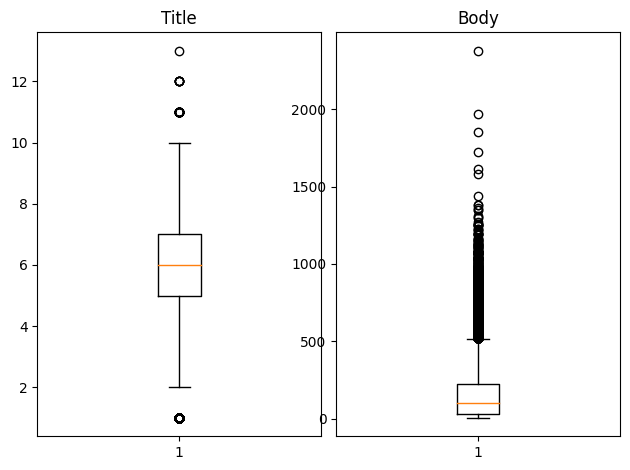

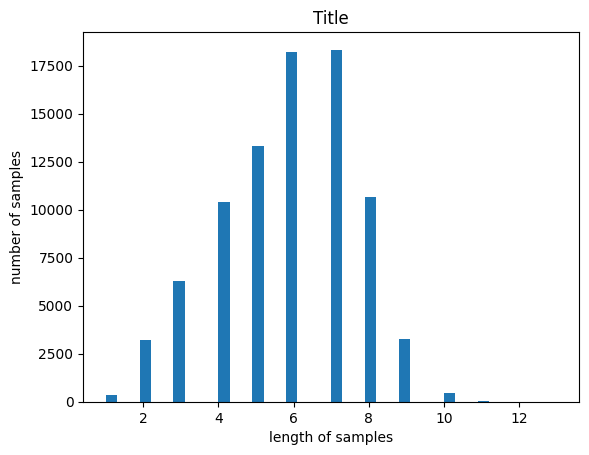

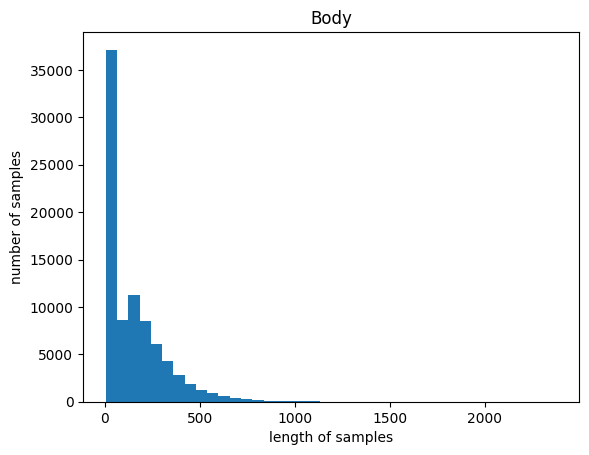

In [119]:
# 길이 분포 출력
title_len = [len(s.split()) for s in df1['YNewsML.NewsContent.Title']]
body_len = [len(s.split()) for s in df1['YNewsML.NewsContent.Body']]

print('제목의 최소 길이 : {}'.format(np.min(title_len)))
print('제목의 최대 길이 : {}'.format(np.max(title_len)))
print('제목의 평균 길이 : {}'.format(np.mean(title_len)))
print('본문의 최소 길이 : {}'.format(np.min(body_len)))
print('본문의 최대 길이 : {}'.format(np.max(body_len)))
print('본문의 평균 길이 : {}'.format(np.mean(body_len)))

plt.subplot(1,2,1)
plt.boxplot(title_len)
plt.title('Title')
plt.tight_layout()
plt.subplot(1,2,2)
plt.boxplot(body_len)
plt.title('Body')
plt.show()


plt.title('Title')
plt.hist(title_len, bins=40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

plt.title('Body')
plt.hist(body_len, bins=40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [120]:
title_max_len = 10
body_max_len = 500

In [121]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s.split()) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))))

In [122]:
below_threshold_len(title_max_len, df1['YNewsML.NewsContent.Title'])

전체 샘플 중 길이가 10 이하인 샘플의 비율: 0.9995382156177847


In [123]:
below_threshold_len(body_max_len, df1['YNewsML.NewsContent.Body'])

전체 샘플 중 길이가 500 이하인 샘플의 비율: 0.9607246462613226


In [124]:
df1 = df1[df1['YNewsML.NewsContent.Title'].apply(lambda x: len(x.split()) <= title_max_len)]
df1 = df1[df1['YNewsML.NewsContent.Body'].apply(lambda x: len(x.split()) <= body_max_len)]
print('전체 샘플수 :',(len(df1)))

전체 샘플수 : 81104


In [125]:
df1.head()

,YNewsML.NewsContent.Title,YNewsML.NewsContent.Body
0,인니 대표 스타트업 고젝 토코피디아와 합병 논의,인니 대표 스타트업 고젝 토코피디아와 합병 논의. 서울연합뉴스 김계환 기자 인도네시...
1,중앙아프리카공화국 대선 결과 투아데레 대통령 재선,중앙아프리카공화국 대선 결과 투아데레 대통령 재선.폭력 사태 치러진 선거서 과반 득...
2,당국 동부구치소 사망자 늑장통보 논란에 화장 전에 통보했다,당국 동부구치소 사망자 늑장통보 논란에 화장 전에 통보했다. .. 0. 동부구치소 ...
3,삼성전자 사흘째 최고가 경신시총 500조 시대,삼성전자 사흘째 최고가 경신시총 500조 시대. .. 0. 삼성전자 주가 PG. 권...
4,지아이그룹세브란스병원 혁신 신약 개발 공동연구 협약,지아이그룹세브란스병원 혁신 신약 개발 공동연구 협약. 서울연합뉴스 김잔디 기자 신약...


seq2se2 트레이닝을 위하 디코더의 입력과 레이블에 시작 토큰(sostoken)과 종료 토큰(eostoken)을 추가

In [126]:
# 제목 데이터에는 시작 토큰과 종료 토큰을 추가한다.
df1['decoder_input'] = df1['YNewsML.NewsContent.Title'].apply(lambda x : 'sostoken '+ x)
df1['decoder_target'] = df1['YNewsML.NewsContent.Title'].apply(lambda x : x + ' eostoken')
df1.head()

,YNewsML.NewsContent.Title,YNewsML.NewsContent.Body,decoder_input,decoder_target
0,인니 대표 스타트업 고젝 토코피디아와 합병 논의,인니 대표 스타트업 고젝 토코피디아와 합병 논의. 서울연합뉴스 김계환 기자 인도네시...,sostoken 인니 대표 스타트업 고젝 토코피디아와 합병 논의,인니 대표 스타트업 고젝 토코피디아와 합병 논의 eostoken
1,중앙아프리카공화국 대선 결과 투아데레 대통령 재선,중앙아프리카공화국 대선 결과 투아데레 대통령 재선.폭력 사태 치러진 선거서 과반 득...,sostoken 중앙아프리카공화국 대선 결과 투아데레 대통령 재선,중앙아프리카공화국 대선 결과 투아데레 대통령 재선 eostoken
2,당국 동부구치소 사망자 늑장통보 논란에 화장 전에 통보했다,당국 동부구치소 사망자 늑장통보 논란에 화장 전에 통보했다. .. 0. 동부구치소 ...,sostoken 당국 동부구치소 사망자 늑장통보 논란에 화장 전에 통보했다,당국 동부구치소 사망자 늑장통보 논란에 화장 전에 통보했다 eostoken
3,삼성전자 사흘째 최고가 경신시총 500조 시대,삼성전자 사흘째 최고가 경신시총 500조 시대. .. 0. 삼성전자 주가 PG. 권...,sostoken 삼성전자 사흘째 최고가 경신시총 500조 시대,삼성전자 사흘째 최고가 경신시총 500조 시대 eostoken
4,지아이그룹세브란스병원 혁신 신약 개발 공동연구 협약,지아이그룹세브란스병원 혁신 신약 개발 공동연구 협약. 서울연합뉴스 김잔디 기자 신약...,sostoken 지아이그룹세브란스병원 혁신 신약 개발 공동연구 협약,지아이그룹세브란스병원 혁신 신약 개발 공동연구 협약 eostoken


In [127]:
encoder_input = np.array(df1['YNewsML.NewsContent.Body'])
decoder_input = np.array(df1['decoder_input'])
decoder_target = np.array(df1['decoder_target'])

In [128]:
indices = np.arange(encoder_input.shape[0])
np.random.shuffle(indices)
print(indices)

[21083 44405 40051 ... 42613 43567 68268]


In [129]:
encoder_input = encoder_input[indices]
decoder_input = decoder_input[indices]
decoder_target = decoder_target[indices]

In [130]:
# 훈련과 테스트 데이터 비율을 8:2로 구분
n_of_val = int(len(encoder_input)*0.2)
print('테스트 데이터의 수 :',n_of_val)

테스트 데이터의 수 : 16220


In [131]:
encoder_input_train = encoder_input[:-n_of_val]
decoder_input_train = decoder_input[:-n_of_val]
decoder_target_train = decoder_target[:-n_of_val]

encoder_input_test = encoder_input[-n_of_val:]
decoder_input_test = decoder_input[-n_of_val:]
decoder_target_test = decoder_target[-n_of_val:]

In [132]:
print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :',len(decoder_input_train))
print('테스트 데이터의 개수 :',len(encoder_input_test))
print('테스트 레이블의 개수 :',len(decoder_input_test))

훈련 데이터의 개수 : 64884
훈련 레이블의 개수 : 64884
테스트 데이터의 개수 : 16220
테스트 레이블의 개수 : 16220


In [133]:
# 텍스트를 숫자로 처리할 수 있도록 정수인코딩 진행
src_tokenizer = Tokenizer()
src_tokenizer.fit_on_texts(encoder_input_train)

In [134]:
threshold = 7
total_cnt = len(src_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in src_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 843962
등장 빈도가 6번 이하인 희귀 단어의 수: 737481
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 106481
단어 집합에서 희귀 단어의 비율: 87.38319971752283
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 14.190040066697007


In [135]:
src_vocab = 100000
src_tokenizer = Tokenizer(num_words = src_vocab) 
src_tokenizer.fit_on_texts(encoder_input_train)

# 텍스트 시퀀스를 정수 시퀀스로 변환
encoder_input_train = src_tokenizer.texts_to_sequences(encoder_input_train) 
encoder_input_test = src_tokenizer.texts_to_sequences(encoder_input_test)

In [136]:
print(encoder_input_train[:3])

[[59260, 16666, 3, 48110, 11, 3524, 114, 19, 11, 59260, 3410, 765, 2041, 40, 2, 1674, 3298, 6, 10, 9, 7, 1], [48, 5515, 12449, 913, 18279, 4681, 9791, 12873, 20974, 5712, 1107, 3281, 9268, 5, 3313, 48, 472, 10159, 1300, 2299, 15296, 9190, 613, 17707, 72488, 3313, 1300, 2299, 3313, 48, 15528, 272, 11405, 16914, 20, 9190, 46031, 16667, 540, 9711, 2, 4844, 17, 6200, 15296, 72489, 16668, 4513, 8794, 707, 78633, 15747, 682, 83, 3181, 1, 16, 8, 1982, 8490, 99, 48, 10084, 72, 691, 36330, 15297, 19483, 670, 6813, 472, 11640, 12730, 14688, 88, 7483, 634, 195, 5987, 17708, 287, 9537, 10159, 3258, 24208, 38, 13, 247, 526, 38999, 30, 48, 4681, 70, 3313, 10159, 4558, 531, 329, 3182, 38, 20974, 72490, 1107, 44110, 2262, 1956, 2207, 42299, 149, 313, 6768, 48, 8964, 17, 440, 72, 28, 29, 4172, 4579, 614, 67382, 53052, 1782, 670, 48, 377, 17709, 78634, 275, 48111, 377, 1397, 544, 136, 40620, 14689, 19483, 42, 12, 8964, 3313, 48, 33056, 8614, 36331, 4634, 2397, 259, 2981, 34107, 682, 3000, 414, 14, 7702,

In [137]:
tar_tokenizer = Tokenizer()
tar_tokenizer.fit_on_texts(decoder_input_train)

In [138]:
threshold = 6
total_cnt = len(tar_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tar_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 97792
등장 빈도가 5번 이하인 희귀 단어의 수: 88857
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 8935
단어 집합에서 희귀 단어의 비율: 90.86326079842932
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 29.2817679558011


In [139]:
tar_vocab = 8500
tar_tokenizer = Tokenizer(num_words = tar_vocab) 
tar_tokenizer.fit_on_texts(decoder_input_train)
tar_tokenizer.fit_on_texts(decoder_target_train)

In [140]:
# 텍스트 시퀀스를 정수 시퀀스로 변환
decoder_input_train = tar_tokenizer.texts_to_sequences(decoder_input_train) 
decoder_target_train = tar_tokenizer.texts_to_sequences(decoder_target_train)
decoder_input_test = tar_tokenizer.texts_to_sequences(decoder_input_test)
decoder_target_test = tar_tokenizer.texts_to_sequences(decoder_target_test)

In [141]:
print(decoder_input_train[:5])

[[1, 2349], [1, 14, 2105, 3760, 423], [1, 56, 396, 274, 301, 6650, 3761], [1, 2918, 3, 7629, 732], [1, 5851, 6651, 7630, 692, 890]]


In [142]:
print(decoder_target_train[:5])

[[2349, 2], [14, 2105, 3760, 423, 2], [56, 396, 274, 301, 6650, 3761, 2], [2918, 3, 7629, 732, 2], [5851, 6651, 7630, 692, 890, 2]]


In [143]:
drop_train = [index for index, sentence in enumerate(decoder_input_train) if len(sentence) == 1]
drop_test = [index for index, sentence in enumerate(decoder_input_test) if len(sentence) == 1]

In [144]:
print('삭제할 훈련 데이터의 개수 :',len(drop_train))
print('삭제할 테스트 데이터의 개수 :',len(drop_test))

삭제할 훈련 데이터의 개수 : 1371
삭제할 테스트 데이터의 개수 : 398


In [145]:
encoder_input_train = np.delete(encoder_input_train, drop_train, axis=0)
decoder_input_train = np.delete(decoder_input_train, drop_train, axis=0)
decoder_target_train = np.delete(decoder_target_train, drop_train, axis=0)

encoder_input_test = np.delete(encoder_input_test, drop_test, axis=0)
decoder_input_test = np.delete(decoder_input_test, drop_test, axis=0)
decoder_target_test = np.delete(decoder_target_test, drop_test, axis=0)

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :',len(decoder_input_train))
print('테스트 데이터의 개수 :',len(encoder_input_test))
print('테스트 레이블의 개수 :',len(decoder_input_test))

훈련 데이터의 개수 : 63513
훈련 레이블의 개수 : 63513
테스트 데이터의 개수 : 15822
테스트 레이블의 개수 : 15822


C:\Users\DMC CONET\AppData\Roaming\Python\Python39\site-packages\numpy\lib\function_base.py:5071: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


In [146]:
encoder_input_train = pad_sequences(encoder_input_train, maxlen = title_max_len, padding='post')
encoder_input_test = pad_sequences(encoder_input_test, maxlen = title_max_len, padding='post')
decoder_input_train = pad_sequences(decoder_input_train, maxlen = body_max_len, padding='post')
decoder_target_train = pad_sequences(decoder_target_train, maxlen = body_max_len, padding='post')
decoder_input_test = pad_sequences(decoder_input_test, maxlen = body_max_len, padding='post')
decoder_target_test = pad_sequences(decoder_target_test, maxlen = body_max_len, padding='post')

In [147]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [148]:
embedding_dim = 128
hidden_size = 256

# 인코더
encoder_inputs = Input(shape=(title_max_len,))

# 인코더의 임베딩 층
enc_emb = Embedding(src_vocab, embedding_dim)(encoder_inputs)

# 인코더의 LSTM 1
encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4, recurrent_dropout = 0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

# 인코더의 LSTM 2
encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

# 인코더의 LSTM 3
encoder_lstm3 = LSTM(hidden_size, return_state=True, return_sequences=True, dropout=0.4, recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

In [149]:
# 디코더
decoder_inputs = Input(shape=(None,))

# 디코더의 임베딩 층
dec_emb_layer = Embedding(tar_vocab, embedding_dim)
dec_emb = dec_emb_layer(decoder_inputs)

# 디코더의 LSTM
decoder_lstm = LSTM(hidden_size, return_sequences = True, return_state = True, dropout = 0.4, recurrent_dropout=0.2)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state = [state_h, state_c])

In [150]:
# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation = 'softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_outputs) 

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 10)]         0           []                               
                                                                                                  
 embedding_2 (Embedding)        (None, 10, 128)      12800000    ['input_3[0][0]']                
                                                                                                  
 lstm_4 (LSTM)                  [(None, 10, 256),    394240      ['embedding_2[0][0]']            
                                 (None, 256),                                                     
                                 (None, 256)]                                                     
                                                                                            

In [151]:
#urllib.request.urlretrieve("https://github.com/ukairia777/tensorflow-nlp-tutorial/blob/main/20.%20Text%20Summarization%20with%20Attention/attention.py", filename="attention.py")
from attention import AttentionLayer

In [152]:
# 어텐션 층(어텐션 함수)
attn_layer = AttentionLayer(name='attention_layer')
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs])

# 어텐션의 결과와 디코더의 hidden state들을 연결
decoder_concat_input = Concatenate(axis = -1, name='concat_layer')([decoder_outputs, attn_out])

# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_concat_input)

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 10)]         0           []                               
                                                                                                  
 embedding_2 (Embedding)        (None, 10, 128)      12800000    ['input_3[0][0]']                
                                                                                                  
 lstm_4 (LSTM)                  [(None, 10, 256),    394240      ['embedding_2[0][0]']            
                                 (None, 256),                                                     
                                 (None, 256)]                                                     
                                                                                            

In [153]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

In [154]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 2)
history = model.fit(x = [encoder_input_train, decoder_input_train], y = decoder_target_train, \
          validation_data = ([encoder_input_test, decoder_input_test], decoder_target_test),
          batch_size = 256, callbacks=[es], epochs = 50)

Epoch 1/50
 97/249 [==========>...................] - ETA: 3:28:23 - loss: 0.6762

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
src_index_to_word = src_tokenizer.index_word # 원문 단어 집합에서 정수 -> 단어를 얻음
tar_word_to_index = tar_tokenizer.word_index # 요약 단어 집합에서 단어 -> 정수를 얻음
tar_index_to_word = tar_tokenizer.index_word # 요약 단어 집합에서 정수 -> 단어를 얻음

In [ ]:
# 인코더 설계
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state_h, state_c])

In [ ]:
# 이전 시점의 상태들을 저장하는 텐서
decoder_state_input_h = Input(shape=(hidden_size,))
decoder_state_input_c = Input(shape=(hidden_size,))

dec_emb2 = dec_emb_layer(decoder_inputs)
# 문장의 다음 단어를 예측하기 위해서 초기 상태(initial_state)를 이전 시점의 상태로 사용. 이는 뒤의 함수 decode_sequence()에 구현
# 훈련 과정에서와 달리 LSTM의 리턴하는 은닉 상태와 셀 상태인 state_h와 state_c를 버리지 않음.
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

In [ ]:
# 어텐션 함수
decoder_hidden_state_input = Input(shape=(title_max_len, hidden_size))
attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# 디코더의 출력층
decoder_outputs2 = decoder_softmax_layer(decoder_inf_concat) 

# 최종 디코더 모델
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

In [ ]:
def decode_sequence(input_seq):
    # 입력으로부터 인코더의 상태를 얻음
    e_out, e_h, e_c = encoder_model.predict(input_seq)

     # <SOS>에 해당하는 토큰 생성
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = tar_word_to_index['sostoken']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition: # stop_condition이 True가 될 때까지 루프 반복

        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = tar_index_to_word[sampled_token_index]

        if(sampled_token!='eostoken'):
            decoded_sentence += ' '+sampled_token

        #  <eos>에 도달하거나 최대 길이를 넘으면 중단.
        if (sampled_token == 'eostoken'  or len(decoded_sentence.split()) >= (body_max_len-1)):
            stop_condition = True

        # 길이가 1인 타겟 시퀀스를 업데이트
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # 상태를 업데이트 합니다.
        e_h, e_c = h, c

    return decoded_sentence

In [ ]:
# 원문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2text(input_seq):
    sentence=''
    for i in input_seq:
        if(i!=0):
            sentence = sentence + src_index_to_word[i]+' '
    return sentence

# 요약문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2summary(input_seq):
    sentence=''
    for i in input_seq:
        if((i!=0 and i!=tar_word_to_index['sostoken']) and i!=tar_word_to_index['eostoken']):
            sentence = sentence + tar_index_to_word[i] + ' '
    return sentence

In [ ]:
for i in range(500, 1000):
    print("원문 : ",seq2text(encoder_input_test[i]))
    print("실제 요약문 :",seq2summary(decoder_input_test[i]))
    print("예측 요약문 :",decode_sequence(encoder_input_test[i].reshape(1, title_max_len)))
    print("\n")

In [ ]:
for i in range(len(df)):
    df['count'][i] = df['YNewsML.NewsContent.Body'][i].count('</YNAOBJECT>')

C:\Users\DMC CONET\AppData\Local\Temp\ipykernel_16608\1247225215.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['count'][i] = df['YNewsML.NewsContent.Body'][i].count('</YNAOBJECT>')


In [ ]:
df['count'].value_counts()

0     63466
1     31292
2      9963
3      3520
4      1176
5       338
6       140
7        43
8        24
10        7
9         5
15        4
11        4
25        3
14        3
19        2
27        1
13        1
12        1
21        1
35        1
20        1
16        1
23        1
28        1
30        1
Name: count, dtype: int64

In [ ]:
df['YNewsML.NewsContent.Body'][1].count('</YNAOBJECT>')

2

In [ ]:
df['YNewsML.Metadata.Href'][1]

'http://yna.kr/AKR20210105124700009?did=2508m'